# <span style="color:darkred"><ins>Inversión en publicidad</ins></span>

El dataset que se analiza nos aporta información sobre el gasto en publicidad y las ventas generadas. En este caso usando la TV, la radio y los periódicos como medios para difundir el mensaje.

**Fuente:** *https://www.kaggle.com/bumba5341/advertisingcsv*

# 1 - Importar librerias y visualización de los datos

In [1]:
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#Plotly
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#linear regression
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore") # ignore warnings

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
print("The dataset has {} rows and {} columns.".format(*df.shape))
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 200 rows and 4 columns.
It contains 0 duplicates.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


* Length: 200
* Features are float
* Our target (SALES) is float too.

### Distribución de los datos

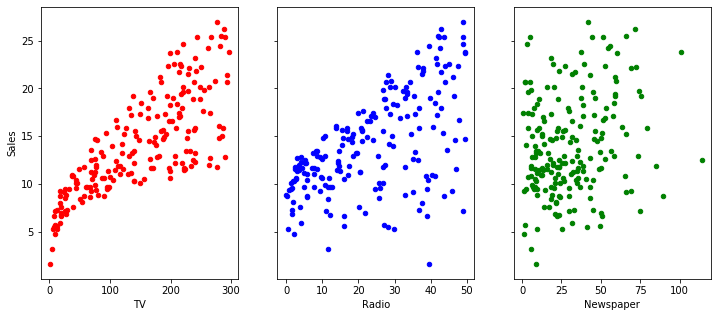

In [5]:
figure, axs = plt.subplots(1,3, figsize=(12, 5), sharey=True, sharex=False) #plot en matriz 2x2, y van a compartir eje 'y' y 'x'(x/ysahre=True)
df.plot(kind="scatter", x="TV", y ="Sales", ax=axs[0], c="red") #plot en la posicion 0,0 de la matriz 2x2
df.plot(kind="scatter", x="Radio", y="Sales", ax=axs[1], c="blue") #plot en la posicion 0,1 de la matriz 2x2
df.plot(kind="scatter", x="Newspaper", y ="Sales", ax=axs[2], c="green") 

Observamos que tenemos una cierta realción lineal entre el gasto en TV y Radio respecto a las ventas obtenidas. Siendo más clara en la TV.

**- Resumen de los datos estadísticos:**

In [6]:
v21 = [go.Box(y=df.TV,name="TV",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
v22 = [go.Box(y=df.Radio,name="Radio",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
v23 = [go.Box(y=df.Newspaper,name="Newspaper",marker=dict(color="rgba(204,0,102,0.9)"),hoverinfo="name+y")]

layout2 = go.Layout(title="TV, Radio y Newspaper",yaxis=dict(range=[0,320], title="Money Spent ($)")) #I hate 33 bedroom

fig2 = go.Figure(data=v21+v22+v23,layout=layout2)
iplot(fig2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f772aff9290>,
      dtype=object)

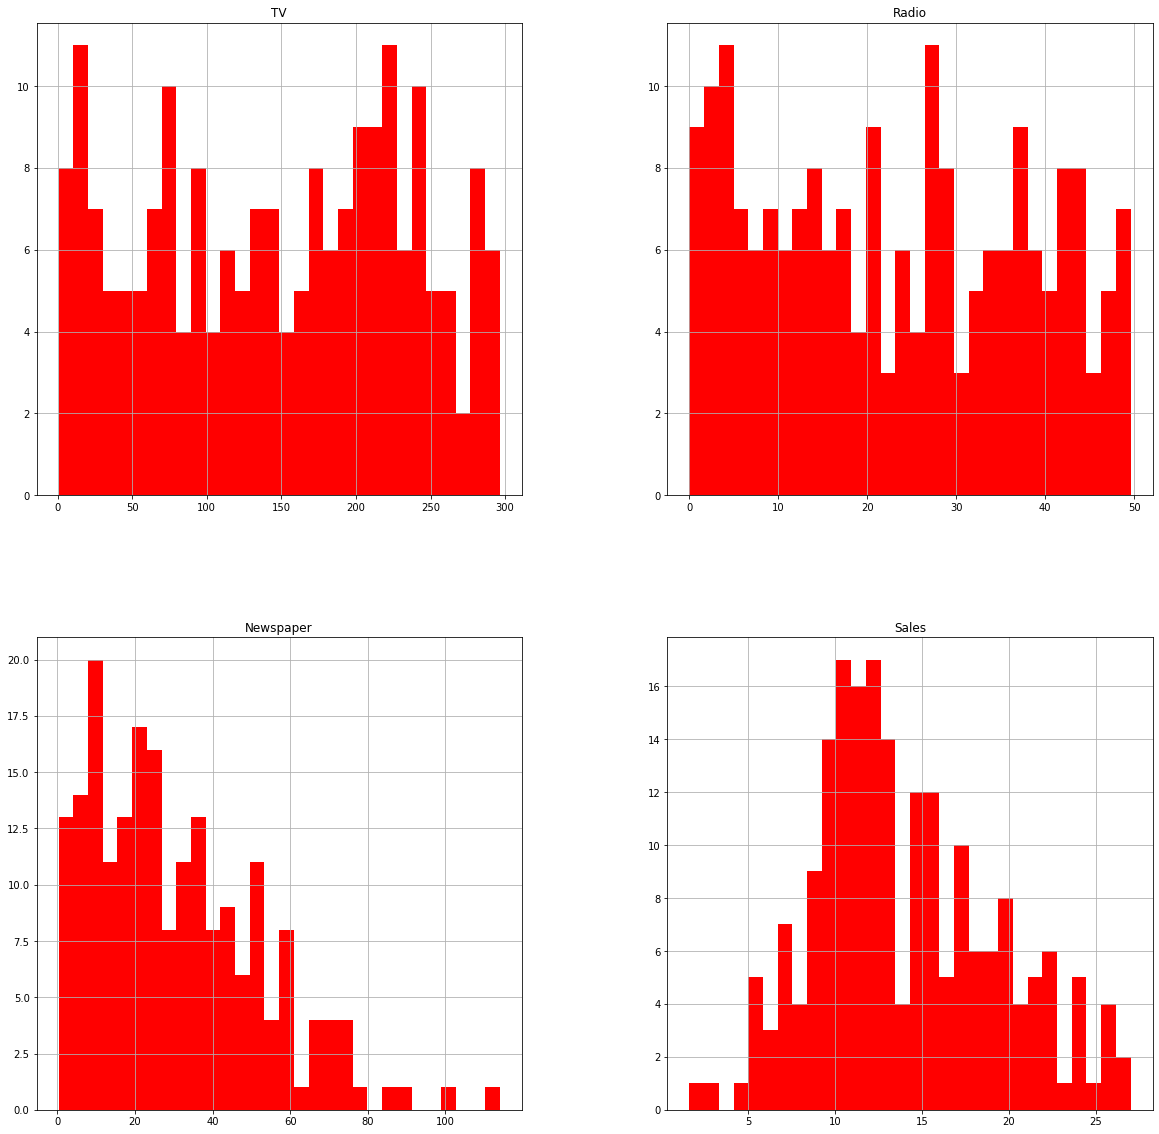

In [7]:
df.hist(bins = 30, figsize = (20, 20), color = 'r')

* El gasto en TV y Radio parece bastante uniforme.
* Tenemos una distribución 'long tail' en Newspaper lo que nos indica que hay más inversión repartida en pequeños gastos.
* En la distribución de ventas parecida a una bimodal.

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Si nos fijamos en la media del los gastos podemos ver como el dinero invertido en TV es ha sido mucho mayor que en Radio y TV

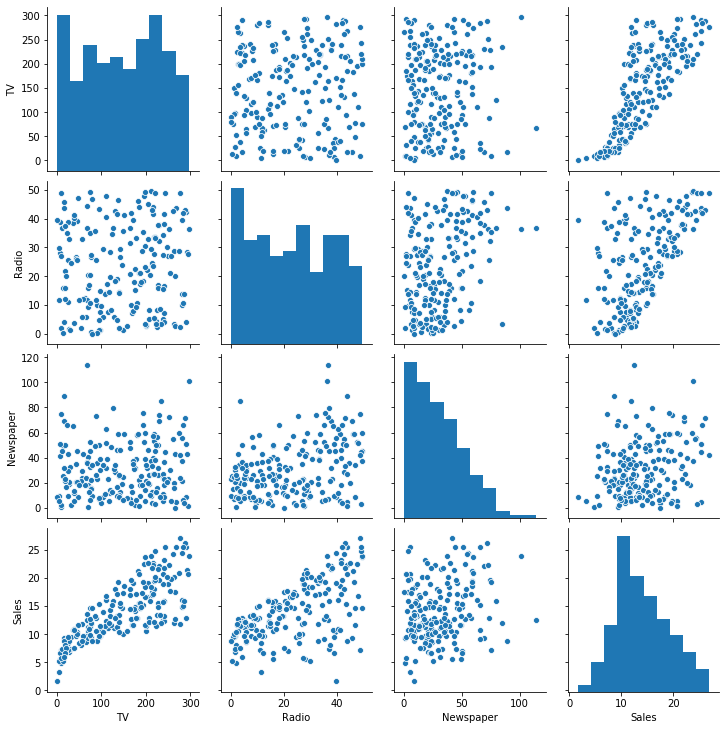

In [9]:
sns.pairplot(df)

### Missing values

In [10]:
#Vemos a ver cuantosdatos tenemos perdidos

total = df.isnull().sum().sort_values(ascending=False) #total de valores perdidos por columna ordenados 
#Porcentaje de valores perdidos respecto al total de cada columna
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
Sales,0,0.0
Newspaper,0,0.0
Radio,0,0.0
TV,0,0.0


No tenemos ningún dato NA

# 2 - Linear Regression

## **2.1 -** Regresión lineal múltiple con enfoque constructivo

Vamos a ir viendo cómo cambian los parámetros mientras vamos realizando regresiones linales simples o múltiples, para ello aplicaremos un enfoque constructivo (selección hacia adelante).

### Sales vs. TV

In [11]:
lm = smf.ols(formula="Sales~TV", data = df).fit()

print("The linear model is:\n \t y = {:.4} + {:.4}*TV"
      .format(lm.params[0], lm.params[1]))

The linear model is:
 	 y = 7.033 + 0.04754*TV


In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        18:42:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ TV + Newspaper

In [13]:
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = df).fit()
print("The linear model is:\n \t y = {:.4} + {:.4}*TV+ {:.4}*Newspaper"
      .format(lm2.params[0], lm2.params[1],lm2.params[2]))

The linear model is:
 	 y = 5.775 + 0.0469*TV+ 0.04422*Newspaper


In [14]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           3.95e-45
Time:                        18:42:19   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Al añadir el periódico a nuestro modelo de las ventas en función de la TV, apenas se modifica y nos aporta algo.

### Sales ~ TV + Radio

In [15]:
#Añadir el Newspaper al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = df).fit()
print("The linear model is:\n \t y = {:.4} + {:.4}*TV+ {:.4}*Radio"
      .format(lm3.params[0], lm3.params[1],lm3.params[2]))

The linear model is:
 	 y = 2.921 + 0.04575*TV+ 0.188*Radio


In [16]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        18:42:19   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos cómo al añadir la Radio a la TV el $R^2$ ha crecido bastante respecto a si añadimos a la TV el Newspaper (de un 0.646 a un 0.897) lo que junto a tener un p-valor pequeño y un F-stadístico muy pequeño también nos indica que vamos por buen camino.

### Sales ~ TV + Radio + Newspaper

In [17]:
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = df).fit()
print("The linear model is:\n \t y = {:.4} + {:.4}*TV+ {:.4}*Radio + {:.4}*Newspaper"
      .format(lm4.params[0], lm4.params[1],lm4.params[2], lm4.params[3]))

The linear model is:
 	 y = 2.939 + 0.04576*TV+ 0.1885*Radio + -0.001037*Newspaper


In [18]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        18:42:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que si añadimos el periodico nos va mal al modelo. El intervalo de confianza ([0.025 0.975]) coge el 0 y además el coeficiente de Newspaper es negativo (-0.0010). Y con un p-valor cercano al 1. Hay que quitarlo.

### Correlación entre las variables

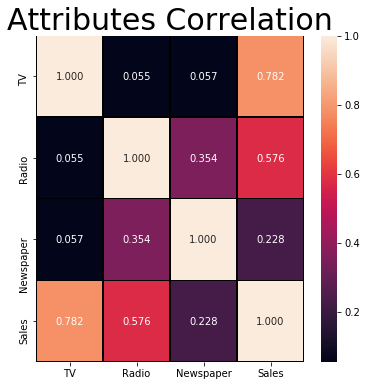

In [19]:
plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.3f")
plt.title("Attributes Correlation",fontsize=30)
plt.show()

Observamos que hay bastante correlacion entre la radio y el periodico (0.354104). Que sea alto con las ventas es bueno, pero que sea altas entre las variables predictoras no. Esta correlación hace que aumente la variabilidad del coeficiente estimado para el modelo, por ello una varible predictora interactua negativamente con la otra.

Para detectar esta multicolinaelidad entre variables se utiliza el VIF (el factor de inflación de la varianza). Este método cuantifica la aparicion de la variabilidad de un coeficiente estimado de una variable particular, debida a la correlacion de dos o mas de las variables predictoras. Esto hay que calcularlo para todas las varibales, y si este valor es muy alto para una variable en particular esta variable se elimina del modelo.

In [20]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_news = smf.ols(formula="Newspaper~TV+Radio", data = df).fit()
rsquared_news = lm_news.rsquared
VIF = 1/(1-rsquared_news)
VIF

1.1451873787239288

In [21]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=df).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [22]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_rad = smf.ols(formula="Radio~Newspaper+TV", data=df).fit()
rsquared_rad = lm_rad.rsquared
VIF = 1/(1-rsquared_rad)
VIF

1.1449519171055353

El periódico y la radio tienen prácticamente el mismo VIF, lo que significa que ambas variables están muy correlacionadas, así que podemos prescindir de una de ellas. Nos quedamos con la Radio al tener un VIF ligeramente inferior.

## **2.2 -** Regresión lineal múltiple usando scikit-learn para la regresión lineal y la selección de rasgos

In [23]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination(RFE)
from sklearn.svm import SVR #svm=super vector machine..y SVR para llevar acabo el modelo lineal

In [24]:
feature_cols = ["TV", "Radio", "Newspaper"] #Columnas de prediccion, variables predictivas
X = df[feature_cols]
Y = df["Sales"] #variable a ser predecida

In [25]:
estimator = SVR(kernel="linear") #estimamos un modelo lineal
selector = RFE(estimator, 2, step=1) #me quiero quedar con 2 variables predictivas dentro del modelo, en 1 paso
selector = selector.fit(X,Y) #que cree el modelo con el X e Y que le indico

In [26]:
selector.support_ #para ver qué variables han sido seleccionadas y rechazadas

array([ True,  True, False])

In [27]:
selector.ranking_ #ranking de variables, las seleccionadas siempre dan 1, 
                  #las rechazadas se ordenan en orden decreciente respecto 
                  #a su significancia para el modelo

array([1, 1, 2])

Como podemos comprobar aquí también ha elegido la TV y la Radio como variables predictoras, eliminándo el Newspaper.

In [28]:
X_pred = X[["TV", "Radio"]] #ya sabemos nuestras variables predictoras

In [29]:
lm5 = LinearRegression()
lm5.fit(X_pred, Y)

print("The linear model is: \n \t y = {:.5} + {:.5}*TV + {:.5}*Radio".format(lm5.intercept_, lm5.coef_[0], lm5.coef_[1]))

The linear model is: 
 	 y = 2.9211 + 0.045755*TV + 0.18799*Radio


In [30]:
lm5.score(X_pred, Y) #Valor de R^2 ajustado

0.8971942610828956

Observamos que tenemos el mismo resultado que obtuvimos seleccionando manualmente las variables.

## **3 -** Modelo predictivo

In [31]:
X = df[['TV', 'Radio']] #los pies cuadrados de espacio habitable interior de la vivienda para los 15 vecinos más cercanos
y = df.Sales.values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,random_state=1)

In [32]:
#Linear Regression
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()

#Fit
modelLR.fit(X_train, y_train)
#Predict
Y_pred = modelLR.predict(X_test)

modelLR.score(X_test,y_test)

0.9230321850256802